# Variable Exploration: status/ Floor/ Transaction

Set up:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the dataset
housing = pd.read_csv("house_prices.csv", keep_default_na=False)#, na_values='null')
housing_copy = housing.copy()

## 5. Status - Interesting variable as it is either na or ready to remove, so I changed all ready to move to 1 and others 0
   => Probably can abandon this information

In [3]:
housing['Status'] = housing['Status'].apply(lambda x: 1 if x == 'Ready to Move' else 0)

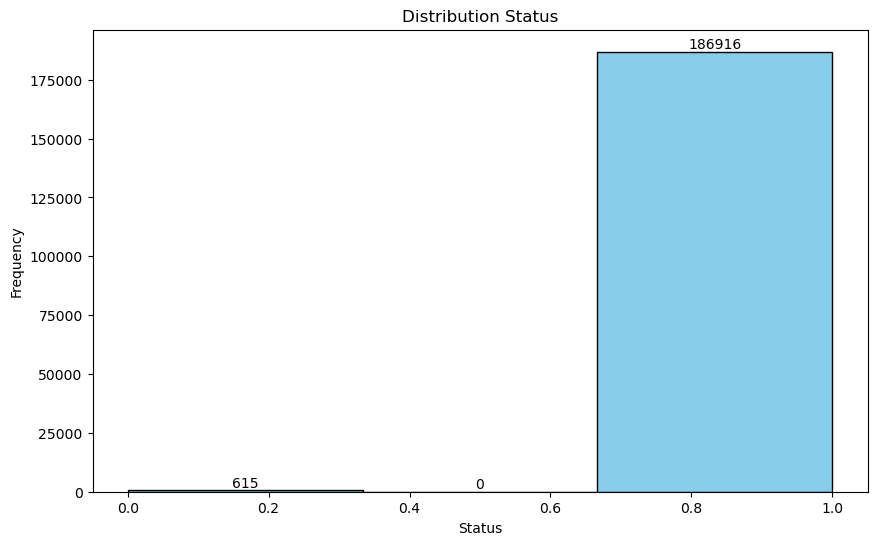

In [4]:
# Create the figure and histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(housing["Status"], bins=3, color='skyblue', edgecolor='black')

# Set titles and labels
plt.title("Distribution Status")
plt.xlabel("Status")
plt.ylabel("Frequency")

# Calculate the bin centers for labeling
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Add counts above each bar using bin centers
for count, center in zip(counts, bin_centers):
    plt.text(center, count, str(int(count)), ha='center', va='bottom')

plt.show()

## 6. Current Floor - pick out the floor

In [5]:
# Split the 'Floor' column first
housing[['Current Floor', 'Total Floors']] = housing['Floor'].str.split(' out of ', expand=True)

housing['Current Floor'] = housing['Current Floor'].replace({'Ground': 0})

# Handle non-numeric values by using pd.to_numeric with errors='coerce'
housing['Current Floor'] = pd.to_numeric(housing['Current Floor'], errors='coerce')
housing['Total Floors'] = pd.to_numeric(housing['Total Floors'], errors='coerce')


# Drop the original 'Floor' column
housing.drop(columns=['Floor'], inplace=True)

In [6]:
housing['Total Floors'].isna().sum() # the missing values

7126

In [7]:
# The indices of the na values of floors (current and total are the same)
floor_naIndx = housing[housing['Total Floors'].isna()].index.tolist()
floor_naIndx

[107,
 288,
 293,
 619,
 626,
 993,
 1004,
 1012,
 1099,
 1100,
 1106,
 1107,
 1108,
 1135,
 1136,
 1140,
 1141,
 1142,
 1161,
 1192,
 1213,
 1225,
 1237,
 1266,
 1295,
 1301,
 1330,
 1346,
 1347,
 1350,
 1365,
 1366,
 1461,
 1469,
 1547,
 1548,
 1549,
 1564,
 1666,
 1714,
 1726,
 1758,
 1796,
 1843,
 1846,
 1848,
 1906,
 1907,
 1908,
 1909,
 1921,
 1947,
 1948,
 1954,
 1963,
 1998,
 2014,
 2021,
 2022,
 2023,
 2030,
 2032,
 2034,
 2041,
 2048,
 2053,
 2059,
 2062,
 2104,
 2143,
 2177,
 2221,
 2226,
 2229,
 2237,
 2238,
 2248,
 2270,
 2287,
 2318,
 2386,
 2387,
 2414,
 2417,
 2453,
 2454,
 2475,
 2507,
 2508,
 2523,
 2536,
 2544,
 2592,
 2619,
 2637,
 2660,
 2736,
 2867,
 2893,
 2945,
 3095,
 3099,
 3116,
 3119,
 3158,
 3201,
 3216,
 3226,
 3236,
 3243,
 3327,
 3335,
 3349,
 3352,
 3365,
 3376,
 3385,
 3416,
 3447,
 3454,
 3456,
 3466,
 3474,
 3483,
 3536,
 3604,
 3728,
 3739,
 3771,
 3786,
 3792,
 3847,
 3895,
 3920,
 4004,
 4019,
 4020,
 4021,
 4028,
 4029,
 4049,
 4056,
 4069,
 4129

In [8]:
# Optionally can fill NaN values or drop rows with them
# housing.dropna(inplace=True)  # Drops rows with NaN values

# Convert to integers after handling NaNs
# housing['Current Floor'] = housing['Current Floor'].astype(int)
# housing['Total Floors'] = housing['Total Floors'].astype(int)

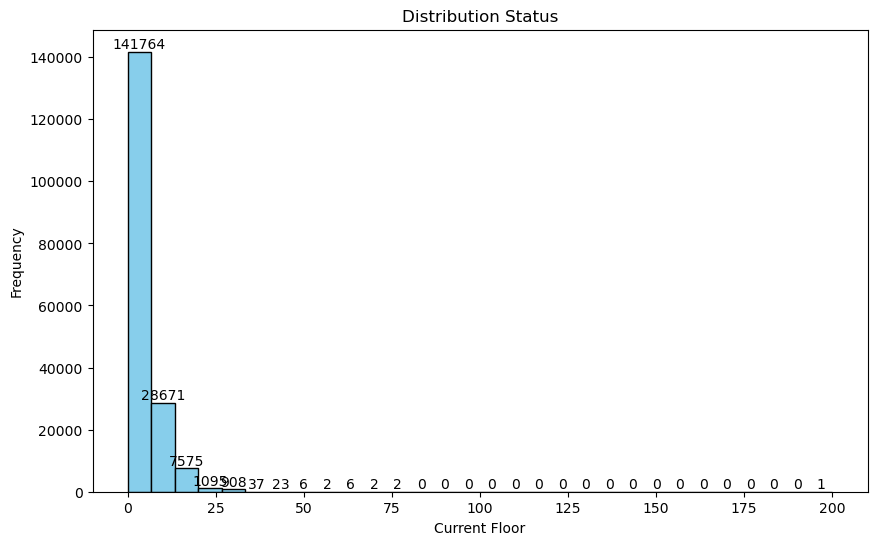

In [9]:
# Create the figure and histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(housing["Current Floor"], bins=30, color='skyblue', edgecolor='black')

# Set titles and labels
plt.title("Distribution Status")
plt.xlabel("Current Floor")
plt.ylabel("Frequency")

# Calculate the bin centers for labeling
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Add counts above each bar using bin centers
for count, center in zip(counts, bin_centers):
    plt.text(center, count, str(int(count)), ha='center', va='bottom')

plt.show()

<Axes: >

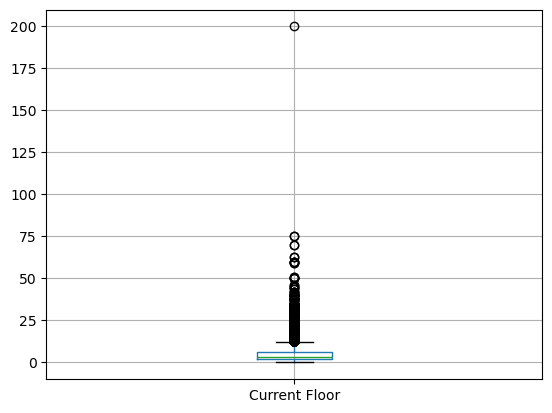

In [10]:
housing.boxplot(column='Current Floor') # this variable should be standardized not normalized due to large amount of outliers

**Found an extreme outlier**

In [11]:
housing['Current Floor'].idxmax() # index of the outlier

167821

In [12]:
print(housing.loc[167821]) # the observation

Index                                                           167821
Title                   2 BHK Ready to Occupy Flat for sale Indranagar
Description          This beautiful 2 BHK Flat is available for sal...
Amount(in rupees)                                             4.3 Lac 
Price (in rupees)                                                 4300
location                                                        kanpur
Carpet Area                                                           
Status                                                               1
Transaction                                                     Resale
Furnishing                                              Semi-Furnished
facing                                                                
overlooking                                                           
Society                                                               
Bathroom                                                             2
Balcon

In [13]:
# Define Scalar
scaler = StandardScaler()
# scale numerical values - ouputs a numpy array
housing['Current Floor.c'] = scaler.fit_transform(housing['Current Floor'].values.reshape(-1, 1))

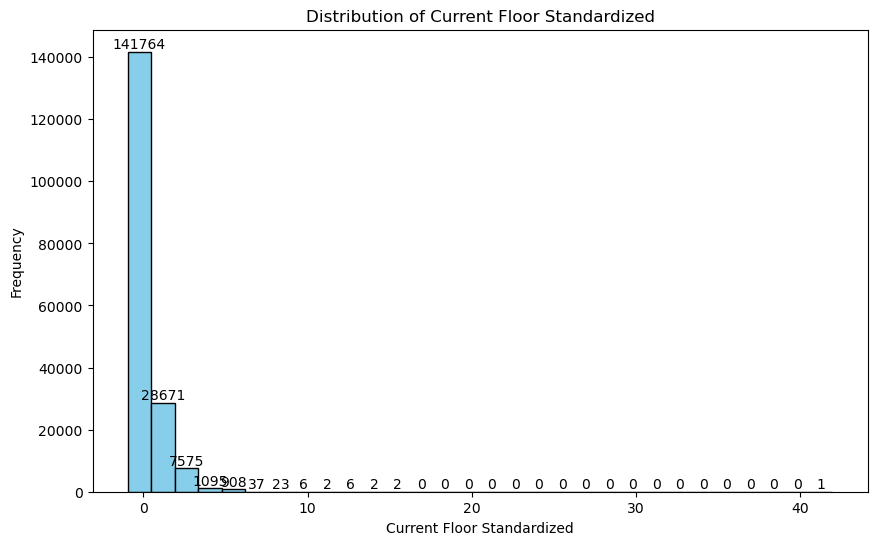

In [14]:
# Create the figure and histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(housing["Current Floor.c"], bins=30, color='skyblue', edgecolor='black')

# Set titles and labels
plt.title("Distribution of Current Floor Standardized")
plt.xlabel("Current Floor Standardized")
plt.ylabel("Frequency")
# Calculate the bin centers for labeling
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Add counts above each bar using bin centers
for count, center in zip(counts, bin_centers):
    plt.text(center, count, str(int(count)), ha='center', va='bottom')

plt.show()

<Axes: >

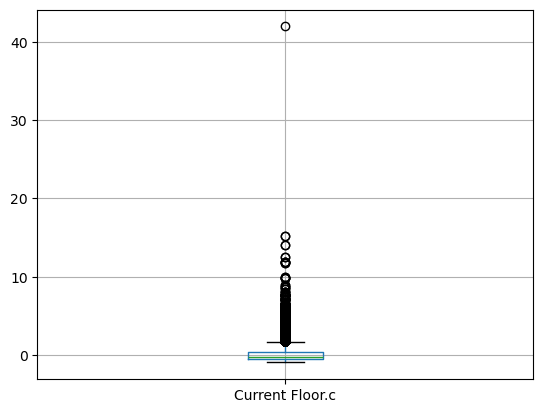

In [15]:
housing.boxplot(column='Current Floor.c') # this variable should be standardized not normalized due to large amount of outliers

If we want to change the current floor to categorical variable:
(we can also delete the na values in housing with following:)

In [16]:
# housing.dropna(subset=['Current Floor'], inplace=True)

In [17]:
housing['c_floor_cat'] = pd.cut(housing['Current Floor'], 
                              bins=[-1, 5 ,10, 15, float('inf')],
                              labels=['1', '2', '3', '4'], 
                              right=True)

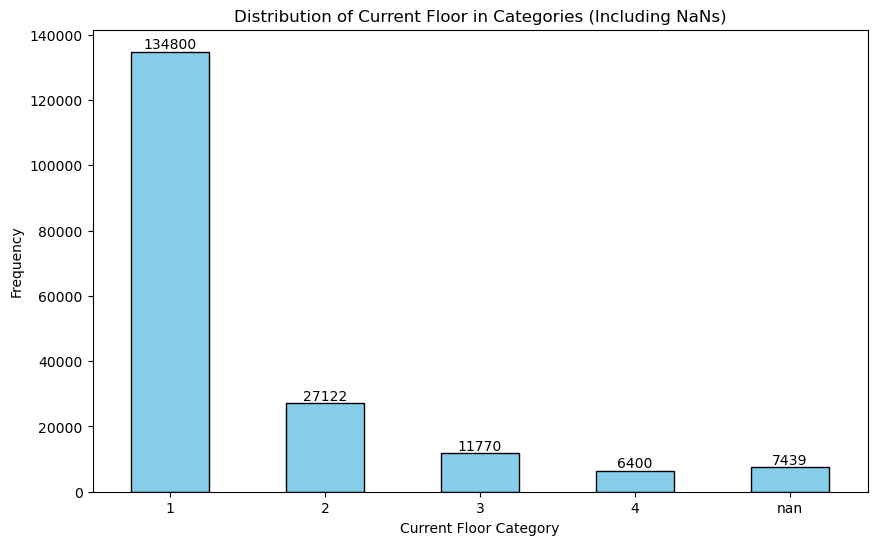

In [18]:
# Count the values in c_floor_cat, including NaNs
category_counts = housing['c_floor_cat'].value_counts(dropna=False).sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set titles and labels
plt.title("Distribution of Current Floor in Categories (Including NaNs)")
plt.xlabel("Current Floor Category")
plt.ylabel("Frequency")


# Add counts above each bar
for index, value in enumerate(category_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)  # Keep x-ticks horizontal
plt.show()


## Total Floors - and set another column of highest level

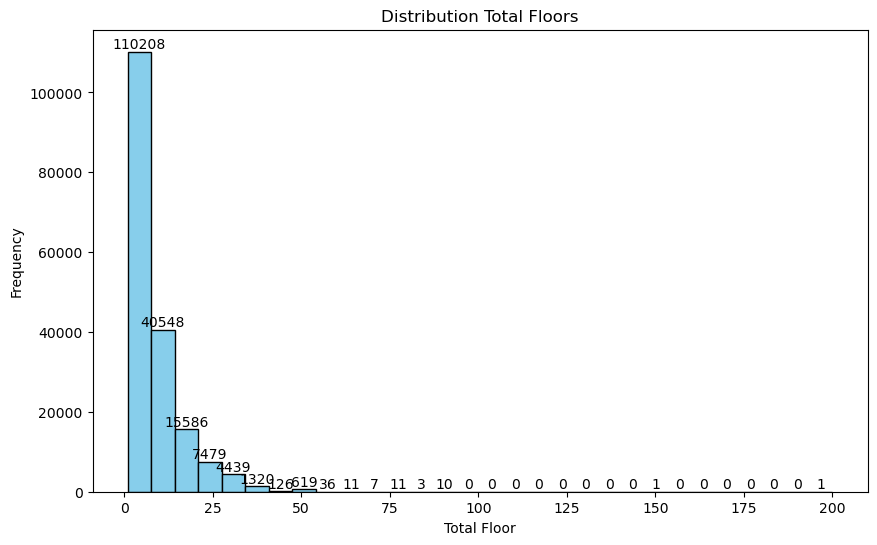

In [19]:
# Create the figure and histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(housing["Total Floors"], bins=30, color = "skyblue", edgecolor='black')

# Set titles and labels
plt.title("Distribution Total Floors")
plt.xlabel("Total Floor")
plt.ylabel("Frequency")

# Calculate the bin centers for labeling
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Add counts above each bar using bin centers
for count, center in zip(counts, bin_centers):
    plt.text(center, count, str(int(count)), ha='center', va='bottom')

plt.show()

<Axes: >

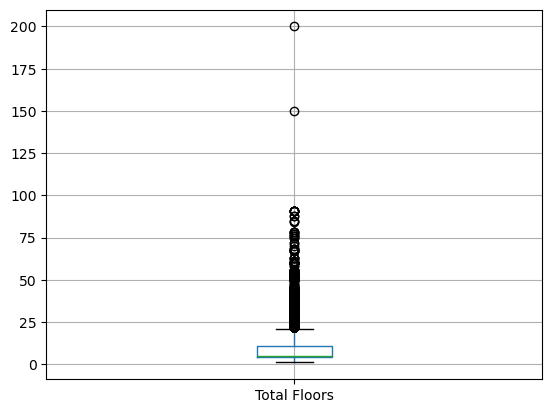

In [20]:
housing.boxplot(column='Total Floors') 

In [21]:
# Standardized the Total Floor
housing['Total Floors.c'] = scaler.fit_transform(housing['Total Floors'].values.reshape(-1, 1))

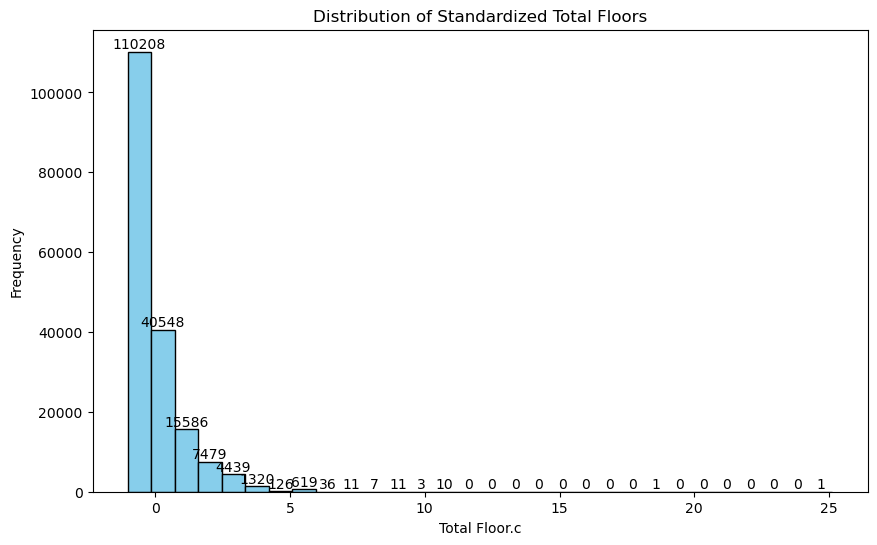

In [22]:
# Create the figure and histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(housing["Total Floors.c"], bins=30, color = "skyblue", edgecolor='black')

# Set titles and labels
plt.title("Distribution of Standardized Total Floors")
plt.xlabel("Total Floor.c")
plt.ylabel("Frequency")

# Calculate the bin centers for labeling
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Add counts above each bar using bin centers
for count, center in zip(counts, bin_centers):
    plt.text(center, count, str(int(count)), ha='center', va='bottom')

plt.show()

<Axes: >

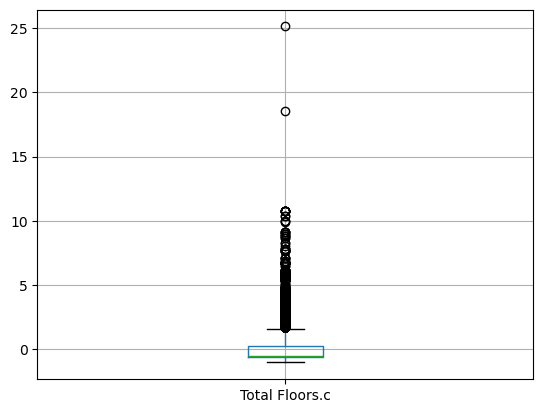

In [23]:
housing.boxplot(column='Total Floors.c') 

**High Correlation between total and current floor?**

<Axes: >

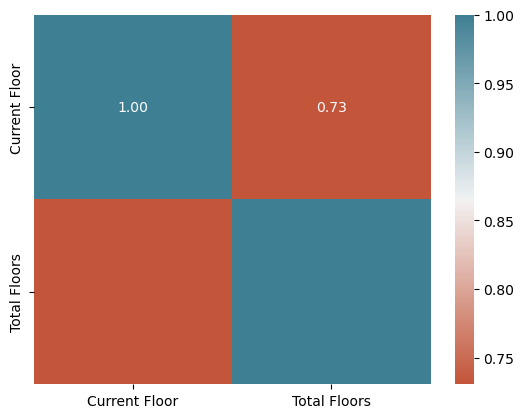

In [24]:
# check for linear relationship between Floor features

housing_floor = housing.loc[:, ['Current Floor','Total Floors']]
floor_correlations = housing_floor.corr()
sns.heatmap(floor_correlations, annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt=".2f")

## 7. Transaction - Change to Categorical Variable

In [25]:
housing['Transaction'].replace('', np.nan, inplace=True)
housing['Transaction'] = pd.Categorical(housing['Transaction'])
housing['Transaction']

0               Resale
1               Resale
2               Resale
3               Resale
4               Resale
              ...     
187526    New Property
187527          Resale
187528          Resale
187529          Resale
187530          Resale
Name: Transaction, Length: 187531, dtype: category
Categories (4, object): ['New Property', 'Other', 'Rent/Lease', 'Resale']

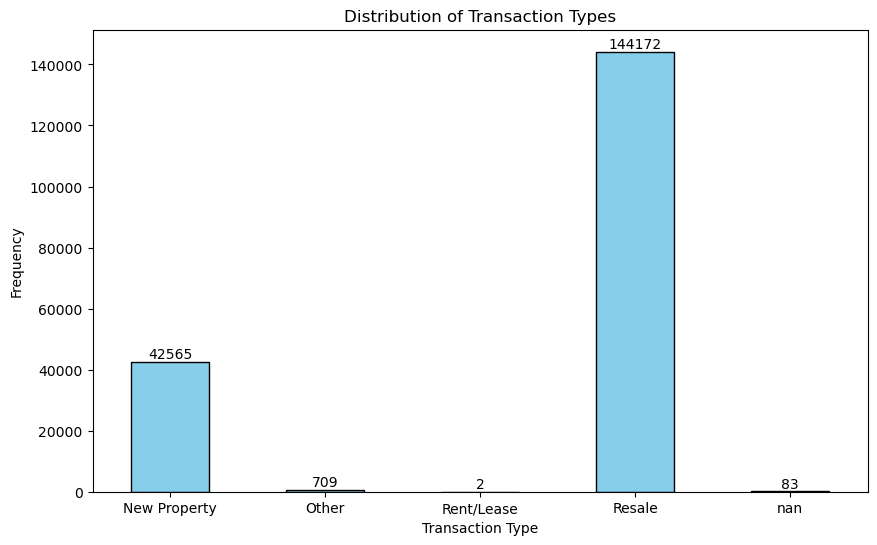

In [26]:
# Count the values in the Transaction categories
category_counts = housing['Transaction'].value_counts(dropna=False).sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set titles and labels
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Frequency")

# Add counts above each bar
for index, value in enumerate(category_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)  # Keep x-ticks horizontal
plt.show()


In [27]:
# Perform one-hot encoding
onehot_Transaction = pd.get_dummies(housing['Transaction'], prefix='Transaction', drop_first=False) #Here, if we delete all na we should use True

# Optionally, concatenate the one-hot encoded DataFrame with the original DataFrame
housing = pd.concat([housing, onehot_Transaction], axis=1)

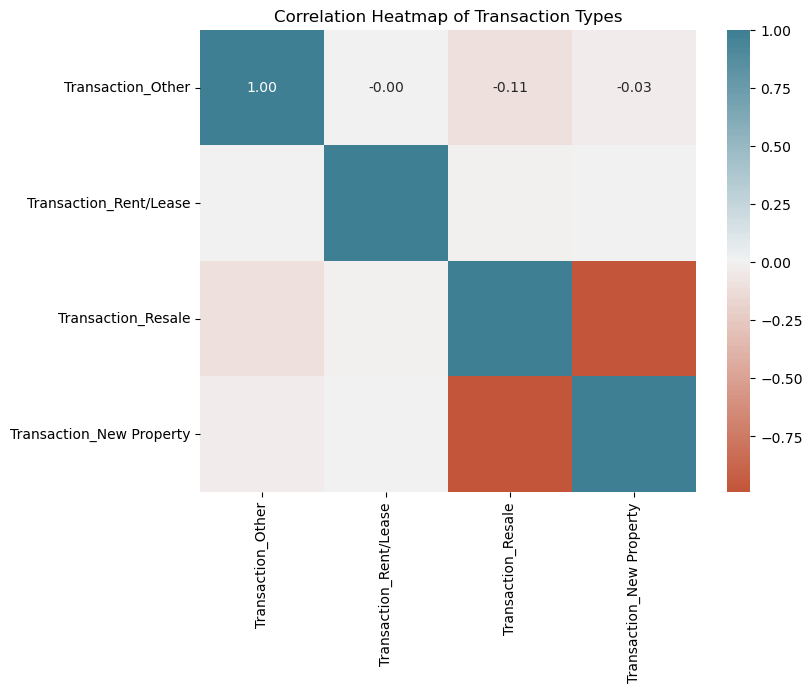

In [28]:
# Select the one-hot encoded columns
housing_trans = housing.loc[:, ['Transaction_Other', 'Transaction_Rent/Lease', 'Transaction_Resale', 'Transaction_New Property']]

# Calculate the correlation matrix
trans_correlations = housing_trans.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(trans_correlations, annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt=".2f")
plt.title('Correlation Heatmap of Transaction Types')
plt.show()

In [29]:
export_variables = ['Status', 'Transaction', 'Transaction_Other','Transaction_Resale','Transaction_New Property', 'Transaction_Rent/Lease','Current Floor','Total Floors', 'Current Floor.c', 'Total Floors.c']
housing_export = housing[export_variables]

In [30]:
housing_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Status                    187531 non-null  int64   
 1   Transaction               187448 non-null  category
 2   Transaction_Other         187531 non-null  bool    
 3   Transaction_Resale        187531 non-null  bool    
 4   Transaction_New Property  187531 non-null  bool    
 5   Transaction_Rent/Lease    187531 non-null  bool    
 6   Current Floor             180092 non-null  float64 
 7   Total Floors              180405 non-null  float64 
 8   Current Floor.c           180092 non-null  float64 
 9   Total Floors.c            180405 non-null  float64 
dtypes: bool(4), category(1), float64(4), int64(1)
memory usage: 8.0 MB


In [31]:
housing_export.to_csv('housing_export_jh380.csv', index=False)

housing_exports = [housing_export_1, housing_export_2, ..., housing_export_n]

combined_housing_export = pd.concat(housing_exports, ignore_index=True, sort=False)